Data Science and Machine Learning Exploritory Analysis <br> <br>
This notebook seeks to use a survey data from the [2020 Kaggle Machine Learning & Data Science Survey kaggle contest](https://www.kaggle.com/c/kaggle-survey-2020/overview) to find the best way to get a in the field. <br>

The industry-wide survey was live for 3.5 weeks in October, and captured 20,036 responses.

I am a South African / Dutch data scientist working about to start my first graduate role in data science so I would like to compare the two countries to determine which languages, environments, and machine learning libraries I should be most familiar with to be best situated to get the best data science role if I do not end up working at the company which I am will be working for after the graduate program.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
np.random.seed(101)

from helper2 import * 
#I have placed most of the code in helper functions
# to keep the notebook clean.

In [2]:
df = pd.read_csv('kaggle_survey_2020_responses.csv')

C:\Users\Jonathan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
for col, i in zip(df.columns,range(df.shape[1])):
    #print(col," : ",df.iloc[0, i])
    for x in df.iloc[0, i].split(' '):
        if x.lower() == 'machine':
            print(col," : ",df.iloc[0, i])
            break

Q15  :  For how many years have you used machine learning methods?
Q16_Part_1  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn 
Q16_Part_2  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   TensorFlow 
Q16_Part_3  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Keras 
Q16_Part_4  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  PyTorch 
Q16_Part_5  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Fast.ai 
Q16_Part_6  :  Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  MXNet 
Q16_Part_7  :  Which 

# Popular languages

## Overall

In [5]:
question_dict = {}

for x in df.columns:
    question_dict[x] = df.loc[0,x]

works


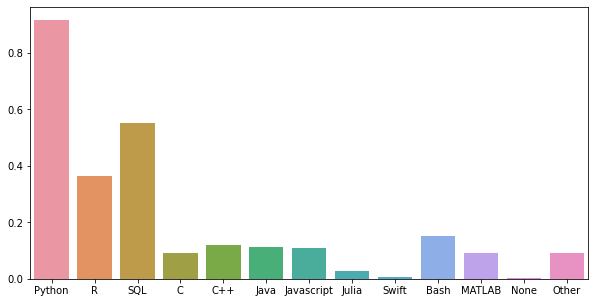

In [6]:
breakdown_main(df1=df[df['Q5']=='Data Scientist'],questionnNumber='Q7',question_dict=question_dict, percent=True)

## South Africa

In [7]:
df_sa =  df[df['Q3']=='South Africa']

In [8]:
df_sa[df_sa['Q5']=='Data Scientist']['Q7_Part_1'].count()

24

In [9]:
df_sa.shape[0]

141

In [10]:
df_sa[df_sa['Q5']=='Data Scientist']['Q7_Part_1'].count()/df_sa[df_sa['Q5']=='Data Scientist'].shape[0]

1.0

works


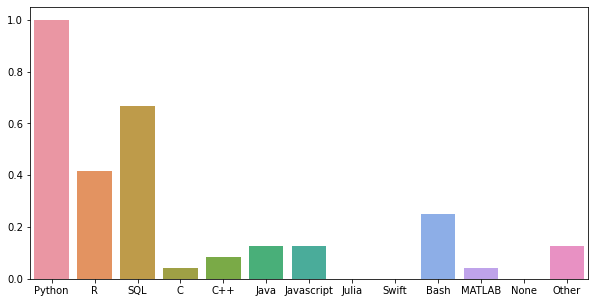

In [11]:
breakdown_main(df1=df_sa[df_sa['Q5']=='Data Scientist'],questionnNumber='Q7',question_dict=question_dict, percent=True)

## Netherlands

In [12]:
df_nl =  df[df['Q3']=='Netherlands']

In [13]:
df_nl[df_nl['Q5']=='Data Scientist']['Q7_Part_1'].count()/df_nl[df_nl['Q5']=='Data Scientist'].shape[0]

0.9142857142857143

In [14]:
df_nl.shape[0]

151

works


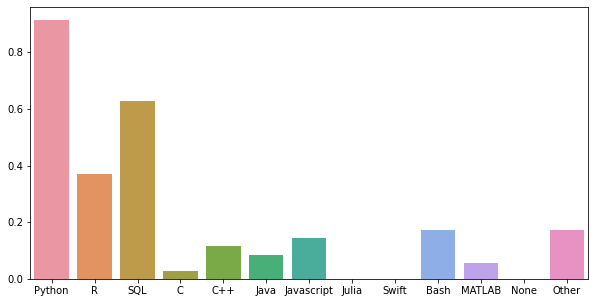

In [15]:
breakdown_main(df1=df_nl[df_nl['Q5']=='Data Scientist'],questionnNumber='Q7',question_dict=question_dict, percent=True)

In [26]:
df_ds_exp = df[df['Q5']=='Data Scientist'].groupby("Q6").count()


In [71]:
list_of_question = []
list_of_languages = []
for x in df_ds_exp.columns:
        if x[0:2] == 'Q7':
            list_of_question.append(x)
            list_of_languages.append(question_dict[x].split(" - ")[-1])

In [72]:
list_of_question

['Q7_Part_1',
 'Q7_Part_2',
 'Q7_Part_3',
 'Q7_Part_4',
 'Q7_Part_5',
 'Q7_Part_6',
 'Q7_Part_7',
 'Q7_Part_8',
 'Q7_Part_9',
 'Q7_Part_10',
 'Q7_Part_11',
 'Q7_Part_12',
 'Q7_OTHER']

In [73]:
df_ds_exp_small = pd.DataFrame()
for x in list_of_question:
    
    df_ds_exp_small[f'{question_dict[x].split(" - ")[-1]}'] = df_ds_exp[x]/df_ds_exp['Q1']

In [95]:
df_ds_exp

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
Q6,,,,,,,,,,,,,,,,,,,,,
1-2 years,460,460,460,460,460,460,446,142,208,45,...,0.097826,0.134783,0.119565,0.086957,0.013043,0.000000,0.056522,0.089130,0.000000,0.052174
10-20 years,355,355,355,355,355,355,329,162,229,36,...,0.101408,0.115493,0.123944,0.135211,0.053521,0.008451,0.273239,0.107042,0.002817,0.146479
20+ years,223,223,223,223,223,223,191,111,143,36,...,0.161435,0.161435,0.183857,0.183857,0.071749,0.013453,0.219731,0.107623,0.008969,0.242152
3-5 years,743,743,743,743,743,743,706,254,410,61,...,0.082100,0.127860,0.129206,0.110363,0.018843,0.004038,0.135935,0.095559,0.002692,0.067295
5-10 years,584,584,584,584,584,584,544,243,383,49,...,0.083904,0.121575,0.097603,0.107877,0.020548,0.008562,0.214041,0.082192,0.000000,0.097603
< 1 years,247,247,247,247,247,247,237,63,100,20,...,0.080972,0.072874,0.048583,0.064777,0.016194,0.000000,0.028340,0.080972,0.000000,0.032389
I have never written code,47,47,47,47,47,47,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


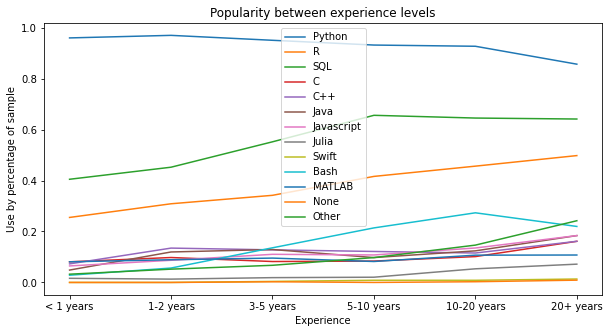

In [105]:
split_over_experience(df_sa, question_num='Q12')

In [130]:
    df_ds_exp = df[df['Q5']=='Data Scientist'].groupby("Q6").count()
    

In [131]:
df_ds_exp

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
Q6,,,,,,,,,,,,,,,,,,,,,
1-2 years,460,460,460,460,460,460,446,142,208,45,...,18,7,4,44,11,5,17,8,40,2
10-20 years,355,355,355,355,355,355,329,162,229,36,...,8,4,3,19,1,1,5,2,28,1
20+ years,223,223,223,223,223,223,191,111,143,36,...,2,0,0,8,0,1,0,2,23,2
3-5 years,743,743,743,743,743,743,706,254,410,61,...,34,11,8,65,10,7,18,8,61,4
5-10 years,584,584,584,584,584,584,544,243,383,49,...,12,5,4,29,3,4,7,7,45,3
< 1 years,247,247,247,247,247,247,237,63,100,20,...,17,7,9,40,14,10,18,8,28,3
I have never written code,47,47,47,47,47,47,0,0,0,0,...,3,1,1,1,1,2,1,1,5,1


In [132]:
    ordered_list_experience = ['< 1 years',
                '1-2 years', 
                 '3-5 years', '5-10 years',
                '10-20 years', '20+ years'
       ]

In [133]:
    list_of_question = []
    list_of_languages = []
    for x in df_ds_exp.columns:
        
        if len(x)>2:
            
            if x.split('_')[0] == "Q12":
                
                print(x)
                list_of_question.append(x)
                list_of_languages.append(question_dict[x].split(" - ")[-1])
        else:
            if x[:2] == "Q12":
                
                print(x)
                list_of_question.append(x)
                list_of_languages.append(question_dict[x].split(" - ")[-1])

Q12_Part_1
Q12_Part_2
Q12_Part_3
Q12_OTHER


In [134]:
list_of_languages

['GPUs', 'TPUs', 'None', 'Other']

In [135]:
df_ds_exp

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
Q6,,,,,,,,,,,,,,,,,,,,,
1-2 years,460,460,460,460,460,460,446,142,208,45,...,18,7,4,44,11,5,17,8,40,2
10-20 years,355,355,355,355,355,355,329,162,229,36,...,8,4,3,19,1,1,5,2,28,1
20+ years,223,223,223,223,223,223,191,111,143,36,...,2,0,0,8,0,1,0,2,23,2
3-5 years,743,743,743,743,743,743,706,254,410,61,...,34,11,8,65,10,7,18,8,61,4
5-10 years,584,584,584,584,584,584,544,243,383,49,...,12,5,4,29,3,4,7,7,45,3
< 1 years,247,247,247,247,247,247,237,63,100,20,...,17,7,9,40,14,10,18,8,28,3
I have never written code,47,47,47,47,47,47,0,0,0,0,...,3,1,1,1,1,2,1,1,5,1


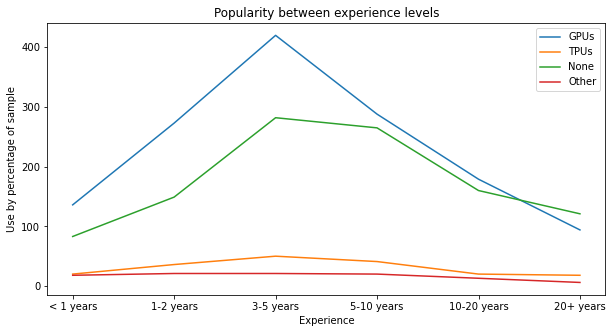

In [136]:
    ordered_df = df_ds_exp.loc[ordered_list_experience,list_of_question]
    ordered_df.columns=list_of_languages
    plt.figure(figsize=(10,5))

    for x in ordered_df.columns:
        ordered_df[x].plot(legend=True,
                      title = "Popularity between experience levels",
                      x='Experience',
                      y='Use by percentage of population')
        plt.xlabel('Experience')
        plt.ylabel('Use by percentage of sample') 

In [153]:
def split_by_exp(df, select_title='Data Scientist', question_num = 'Q7'  ):
    
    df_ds_exp = df[df['Q5']==select_title].groupby("Q6").count()
    ordered_list_experience = ['< 1 years',
                '1-2 years', 
                 '3-5 years', '5-10 years',
                '10-20 years', '20+ years'
       ]
   
    list_of_question = []
    list_of_languages = []
    for x in df_ds_exp.columns:
        
        if len(x)>2:
            
            if x.split('_')[0] == question_num:
                
                print(x)
                list_of_question.append(x)
                list_of_languages.append(question_dict[x].split(" - ")[-1])
        else:
            if x[:2] == question_num:
                
                print(x)
                list_of_question.append(x)
                list_of_languages.append(question_dict[x].split(" - ")[-1])
    
    ordered_df = df_ds_exp.loc[ordered_list_experience,list_of_question]
    ordered_df.columns=list_of_languages
    plt.figure(figsize=(10,5))

    for x in ordered_df.columns:
        ordered_df[x].plot(legend=True,
                      title = "Popularity between experience levels",
                      x='Experience',
                      y='Use by percentage of population')
        plt.xlabel('Experience')
        plt.ylabel('Use by percentage of sample') 

Q12_Part_1
Q12_Part_2
Q12_Part_3
Q12_OTHER


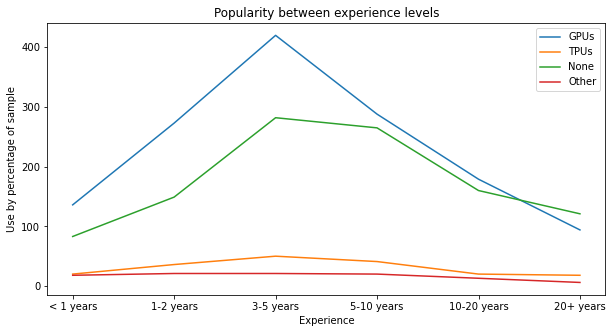

In [154]:
split_by_exp(df, select_title='Data Scientist', question_num = 'Q12')

In [128]:
def split_over_experience(df, select_title='Data Scientist', question_num = 'Q7'):
    
    
    
    df_ds_exp = df[df['Q5']=='Data Scientist'].groupby("Q6").count()
    
    ordered_list_experience = ['< 1 years',
                '1-2 years', 
                 '3-5 years', '5-10 years',
                '10-20 years', '20+ years'
       ]
    list_of_question = []
    list_of_languages = []
    for x in df_ds_exp.columns:
        if x[0:2] == question_num:
            list_of_question.append(x)
            list_of_languages.append(question_dict[x].split(" - ")[-1])

    ordered_df = df_ds_exp.loc[ordered_list_experience,list_of_question]
    ordered_df.columns=list_of_languages
    plt.figure(figsize=(10,5))

    for x in ordered_df.columns:
        ordered_df[x].plot(legend=True,
                      title = "Popularity between experience levels",
                      x='Experience',
                      y='Use by percentage of population')
        plt.xlabel('Experience')
        plt.ylabel('Use by percentage of sample') 

In [129]:
split_over_experience(df, select_title='Data Scientist', question_num = 'Q12')

<Figure size 720x360 with 0 Axes>

In [82]:
ordered_list_experience = ['< 1 years',
                '1-2 years', 
                 '3-5 years', '5-10 years',
                '10-20 years', '20+ years'
       ]

In [84]:
ordered_df = df_ds_exp_small.loc[ordered_list_experience,:]

In [81]:
df_ds_exp_small.T.columns

Index(['1-2 years', '10-20 years', '20+ years', '3-5 years', '5-10 years',
       '< 1 years', 'I have never written code'],
      dtype='object', name='Q6')

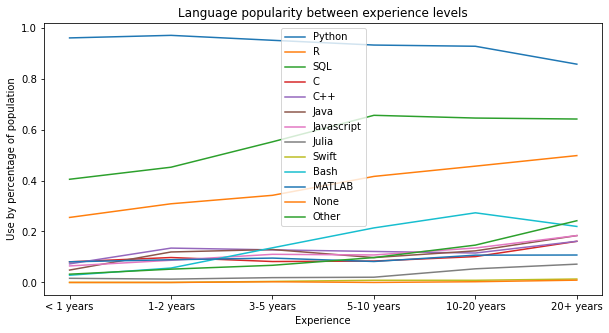

In [92]:
plt.figure(figsize=(10,5))

for x in ordered_df.columns:
    ordered_df[x].plot(legend=True,
                      title = "Language popularity between experience levels",
                      x='Experience',
                      y='Use by percentage of population')
    plt.xlabel('Experience')
    plt.ylabel('Use by percentage of population') 


In [48]:
df_ds_exp['Q1']

Q6
1-2 years                    460
10-20 years                  355
20+ years                    223
3-5 years                    743
5-10 years                   584
< 1 years                    247
I have never written code     47
Name: Q1, dtype: int64

In [50]:
small_df

,1-2 years,10-20 years,20+ years,3-5 years,5-10 years,< 1 years,I have never written code,Q1,Q7_OTHER,Q7_Part_1,...,Q7_Part_11,Q7_Part_12,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9
Q6,,,,,,,,,,,,,,,,,,,,,
1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-20 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-5 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5-10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
< 1 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
small_df['Q1'] = df_ds_exp['Q1']

In [43]:
small_df

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
Q6,,,,,,,,,,,,,
1-2 years,446,142,208,45,62,55,40,6,0,26,41,0,24
10-20 years,329,162,229,36,41,44,48,19,3,97,38,1,52
20+ years,191,111,143,36,36,41,41,16,3,49,24,2,54
3-5 years,706,254,410,61,95,96,82,14,3,101,71,2,50
5-10 years,544,243,383,49,71,57,63,12,5,125,48,0,57
< 1 years,237,63,100,20,18,12,16,4,0,7,20,0,8
I have never written code,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
df_ds_exp

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
Q6,,,,,,,,,,,,,,,,,,,,,
1-2 years,460,460,460,460,460,460,446,142,208,45,...,18,7,4,44,11,5,17,8,40,2
10-20 years,355,355,355,355,355,355,329,162,229,36,...,8,4,3,19,1,1,5,2,28,1
20+ years,223,223,223,223,223,223,191,111,143,36,...,2,0,0,8,0,1,0,2,23,2
3-5 years,743,743,743,743,743,743,706,254,410,61,...,34,11,8,65,10,7,18,8,61,4
5-10 years,584,584,584,584,584,584,544,243,383,49,...,12,5,4,29,3,4,7,7,45,3
< 1 years,247,247,247,247,247,247,237,63,100,20,...,17,7,9,40,14,10,18,8,28,3
I have never written code,47,47,47,47,47,47,0,0,0,0,...,3,1,1,1,1,2,1,1,5,1


In [36]:
small_df

,1-2 years,10-20 years,20+ years,3-5 years,5-10 years,< 1 years,I have never written code,Q7_OTHER,Q7_Part_1,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9
Q6,,,,,,,,,,,,,,,,,,,,
1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-20 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-5 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5-10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
< 1 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
small_df.columns = list_of_languages

ValueError: Length mismatch: Expected axis has 20 elements, new values have 13 elements

In [31]:
small_df

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
Q6,,,,,,,,,,,,,
1-2 years,446,142,208,45,62,55,40,6,0,26,41,0,24
10-20 years,329,162,229,36,41,44,48,19,3,97,38,1,52
20+ years,191,111,143,36,36,41,41,16,3,49,24,2,54
3-5 years,706,254,410,61,95,96,82,14,3,101,71,2,50
5-10 years,544,243,383,49,71,57,63,12,5,125,48,0,57
< 1 years,237,63,100,20,18,12,16,4,0,7,20,0,8
I have never written code,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
count_languages(df_ds_exp, question_dict=question_dict, questionnNumber = 'Q7')

{'Python': 7,
 'R': 7,
 'SQL': 7,
 'C': 7,
 'C++': 7,
 'Java': 7,
 'Javascript': 7,
 'Julia': 7,
 'Swift': 7,
 'Bash': 7,
 'MATLAB': 7,
 'None': 7,
 'Other': 7}

## Disscusion

Python, R and SQL are the most popular langauges by a large margin. Interestingly all South African data scientist used Python, whereas that is 91% in the Netherlands.  

# Machine learning

In [173]:
list_of_question_numbers = []

for col, i in zip(df.columns,range(df.shape[1])):
    
    for x in df.iloc[0, i].split(' '):
        if x.lower() == 'machine':
            
            #print(col," : ",df.iloc[0, i])
            list_of_question_numbers.append(col)
            
list_of_question_numbers = list(set([x.split('_')[0] for x in list_of_question_numbers]))

Q33_A_Part_1
Q33_A_Part_2
Q33_A_Part_3
Q33_A_Part_4
Q33_A_Part_5
Q33_A_Part_6
Q33_A_Part_7
Q33_A_OTHER
Q33_B_Part_1
Q33_B_Part_2
Q33_B_Part_3
Q33_B_Part_4
Q33_B_Part_5
Q33_B_Part_6
Q33_B_Part_7
Q33_B_OTHER
Q22


<Figure size 720x360 with 0 Axes>

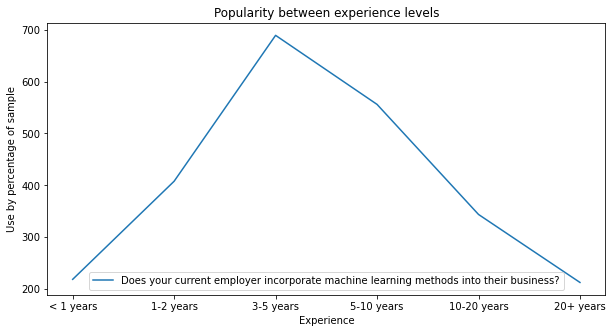

Q16_Part_1
Q16_Part_2
Q16_Part_3
Q16_Part_4
Q16_Part_5
Q16_Part_6
Q16_Part_7
Q16_Part_8
Q16_Part_9
Q16_Part_10
Q16_Part_11
Q16_Part_12
Q16_Part_13
Q16_Part_14
Q16_Part_15
Q16_OTHER


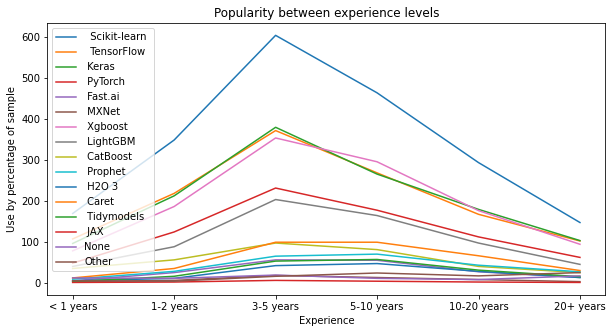

Q36_Part_1
Q36_Part_2
Q36_Part_3
Q36_Part_4
Q36_Part_5
Q36_Part_6
Q36_Part_7
Q36_Part_8
Q36_Part_9
Q36_OTHER


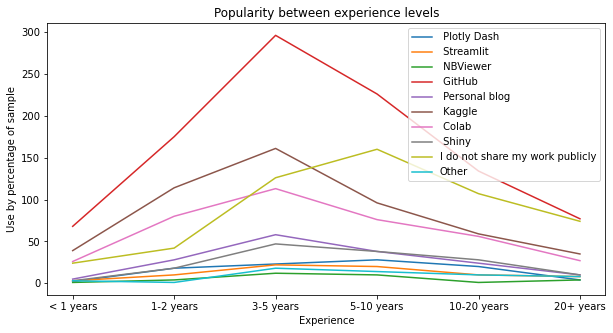

Q34_A_Part_1
Q34_A_Part_2
Q34_A_Part_3
Q34_A_Part_4
Q34_A_Part_5
Q34_A_Part_6
Q34_A_Part_7
Q34_A_Part_8
Q34_A_Part_9
Q34_A_Part_10
Q34_A_Part_11
Q34_A_OTHER
Q34_B_Part_1
Q34_B_Part_2
Q34_B_Part_3
Q34_B_Part_4
Q34_B_Part_5
Q34_B_Part_6
Q34_B_Part_7
Q34_B_Part_8
Q34_B_Part_9
Q34_B_Part_10
Q34_B_Part_11
Q34_B_OTHER
Q35_A_Part_1
Q35_A_Part_2
Q35_A_Part_3
Q35_A_Part_4
Q35_A_Part_5
Q35_A_Part_6
Q35_A_Part_7
Q35_A_Part_8
Q35_A_Part_9
Q35_A_Part_10
Q35_A_OTHER
Q35_B_Part_1
Q35_B_Part_2
Q35_B_Part_3
Q35_B_Part_4
Q35_B_Part_5
Q35_B_Part_6
Q35_B_Part_7
Q35_B_Part_8
Q35_B_Part_9
Q35_B_Part_10
Q35_B_OTHER
Q15


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

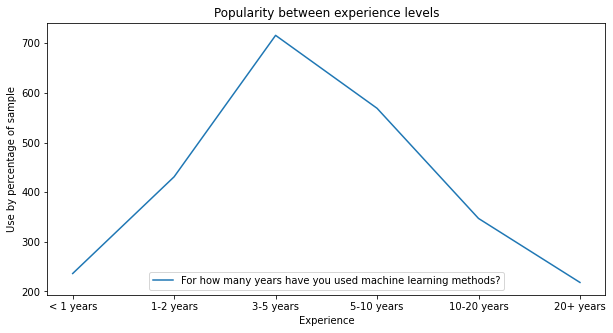

Q28_A_Part_1
Q28_A_Part_2
Q28_A_Part_3
Q28_A_Part_4
Q28_A_Part_5
Q28_A_Part_6
Q28_A_Part_7
Q28_A_Part_8
Q28_A_Part_9
Q28_A_Part_10
Q28_A_OTHER
Q28_B_Part_1
Q28_B_Part_2
Q28_B_Part_3
Q28_B_Part_4
Q28_B_Part_5
Q28_B_Part_6
Q28_B_Part_7
Q28_B_Part_8
Q28_B_Part_9
Q28_B_Part_10
Q28_B_OTHER
Q25


<Figure size 720x360 with 0 Axes>

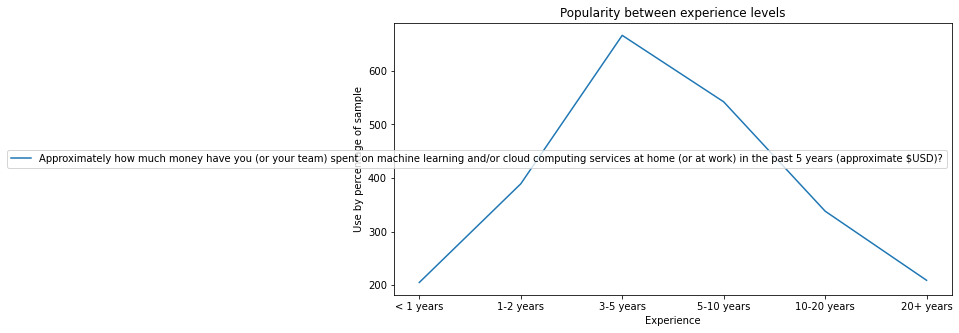

Q23_Part_1
Q23_Part_2
Q23_Part_3
Q23_Part_4
Q23_Part_5
Q23_Part_6
Q23_Part_7
Q23_OTHER


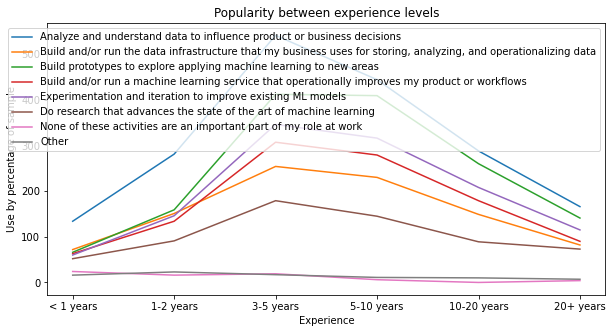

In [176]:
list_of_errors = []
for x in list_of_question_numbers:
    try:
        split_by_exp(df, select_title='Data Scientist', question_num = x)
        plt.show()
    except:
        list_of_errors.append(x)
        


In [158]:
            

                try:
                    list_of_question_numbers.append(col.splitlit['_'][0])
                    list_of_questions.append(question_dict[col].split("?")[0])
                except:
                    
                    list_of_question_numbers.append(col)
                    list_of_questions.append(question_dict[col].split("?")[0])
           

In [170]:
list(set([x.split('_')[0] for x in list_of_question_numbers]))

['Q33', 'Q22', 'Q16', 'Q36', 'Q34', 'Q35', 'Q15', 'Q28', 'Q25', 'Q23']

In [163]:
list_of_questions2 = []
for x in set(list_of_questions):
    if len(x.split(':'))>1:
        list_of_questions2.append(x.split(':')[0])

   

In [167]:
list(set(list_of_questions))

['Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning',
 'Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years',
 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis',
 'Which of the following machine learning frameworks do you use on a regular basis',
 'In the next 2 years, do you hope to become more familiar with any of these specific machine learning products',
 'For how many years have you used machine learning methods',
 'Do you use any of the following machine learning products on a regular basis',
 'Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis',
 'Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar

In [165]:
list(set(list_of_questions2))

['Select any activities that make up an important part of your role at work']

In [ ]:
Q28_A_Part_1  